In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/dataset.csv/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


Comprobamos si hay valores nulos

In [4]:
print(df.isnull().sum())

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Chronic Medical Conditions      0
dtype: int64


In [5]:
df['Chronic Medical Conditions'].value_counts(normalize=True)

Chronic Medical Conditions
No     0.670813
Yes    0.329187
Name: proportion, dtype: float64

Hay un desbalanceo considerable

Vemos que está un poco desbalanceada, pero es lógico ya que la cronificación de la depresión no es lo usual, y quizá son valores suficientes para el entreno. No obstante, en el notebook de modelos, trataremos los datos del train para que tenga un buen entreno, pero sin modificar los registros originales.

# FEATURE ENGINEERING

### TARGET (Chronic Medical Conditions)

Lo primero, trasnformamos a numérica la variable target

In [6]:
df['Chronic Medical Conditions'] = df['Chronic Medical Conditions'].replace({'Yes': 1, 'No': 0})

<Axes: xlabel='Chronic Medical Conditions', ylabel='Count'>

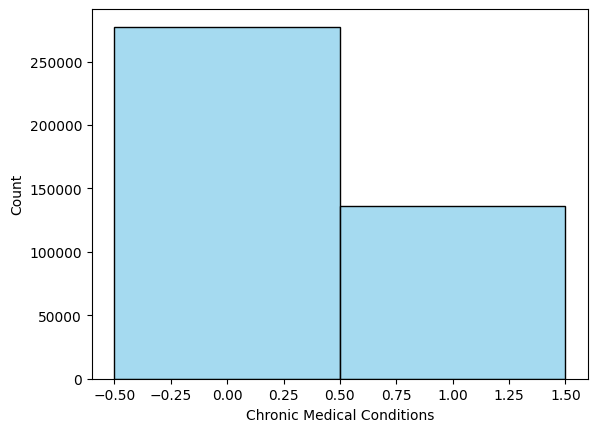

In [7]:
sns.histplot(df['Chronic Medical Conditions'], bins=2, discrete=True, kde=False, color='skyblue')

## Variables ordinales binarias (History of Mental Illnes, Family History of Depression, History of Substance Abuse,)

Las puntuaciones que asignemos para las variables ordinales, serán correspondientes con malos hábitos. Es decir, a peor hábito, mayor puntuación.

In [8]:
df['History of Mental Illness'].unique()
df['History of Mental Illness'] = df['History of Mental Illness'].replace({'Yes': 1, 'No': 0})

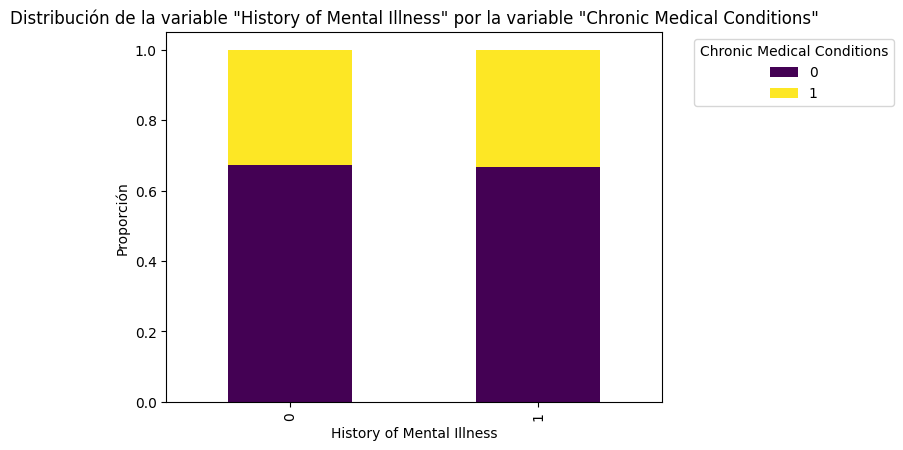

In [10]:
cross_tab = pd.crosstab(df['History of Mental Illness'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "History of Mental Illness" por la variable "Chronic Medical Conditions"')
plt.xlabel('History of Mental Illness')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [11]:
df['History of Mental Illness'].value_counts(normalize= True)

History of Mental Illness
0    0.695904
1    0.304096
Name: proportion, dtype: float64

In [12]:
df.groupby('History of Mental Illness')['Chronic Medical Conditions'].value_counts().unstack(fill_value=0)

Chronic Medical Conditions,0,1
History of Mental Illness,,
0,193696,94247
1,83865,41960


Calculamos el porcentaje de proporción para la target según la variable que estamos tratando (History of mental illness)

In [14]:
total_por_grupo = df['History of Mental Illness'].value_counts()

conteo_condiciones = df.groupby('History of Mental Illness')['Chronic Medical Conditions'].sum()

porcentaje_condiciones = (conteo_condiciones / total_por_grupo) * 100

print(porcentaje_condiciones)

History of Mental Illness
0    32.731131
1    33.347904
dtype: float64


Observamos que no hay practicamente nada de correlación en esta variable.

### Family History of Depression

In [9]:
df['Family History of Depression'] = df['Family History of Depression'].replace({'Yes': 1, 'No': 0})

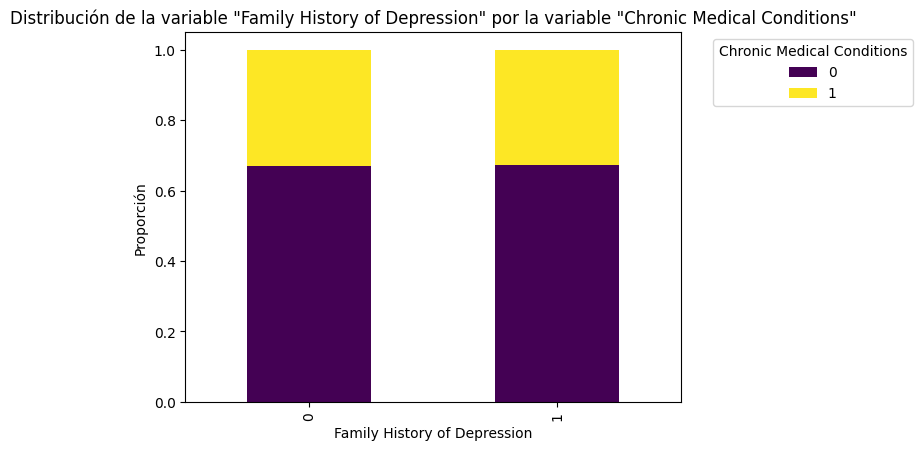

In [16]:
cross_tab = pd.crosstab(df['Family History of Depression'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Family History of Depression" por la variable "Chronic Medical Conditions"')
plt.xlabel('Family History of Depression')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [17]:
df.groupby('Family History of Depression')['Chronic Medical Conditions'].value_counts().unstack(fill_value=0)

Chronic Medical Conditions,0,1
Family History of Depression,,
0,202735,99780
1,74826,36427


In [18]:
total_por_grupo = df['Family History of Depression'].value_counts()

conteo_condiciones = df.groupby('Family History of Depression')['Chronic Medical Conditions'].sum()

porcentaje_condiciones = (conteo_condiciones / total_por_grupo) * 100

print(porcentaje_condiciones)

Family History of Depression
0    32.983488
1    32.742488
dtype: float64


Nos pasa lo mismo que con la anterior, las clases están muy balanceadas

### History of Substance Abuse

In [19]:
df['History of Substance Abuse'] = df['History of Substance Abuse'].replace({'Yes': 1, 'No': 0})

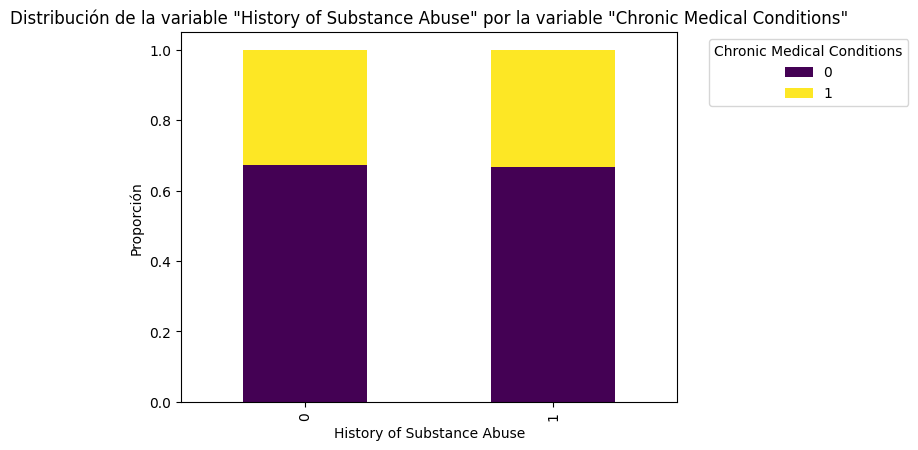

In [20]:
cross_tab = pd.crosstab(df['History of Substance Abuse'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "History of Substance Abuse" por la variable "Chronic Medical Conditions"')
plt.xlabel('History of Substance Abuse')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [21]:
df.groupby('History of Substance Abuse')['Chronic Medical Conditions'].value_counts().unstack(fill_value=0)

Chronic Medical Conditions,0,1
History of Substance Abuse,,
0,191399,93481
1,86162,42726


In [22]:
total_por_grupo = df['History of Substance Abuse'].value_counts()

conteo_condiciones = df.groupby('History of Substance Abuse')['Chronic Medical Conditions'].sum()

porcentaje_condiciones = (conteo_condiciones / total_por_grupo) * 100

print(porcentaje_condiciones)

History of Substance Abuse
0    32.814167
1    33.149711
dtype: float64


Con todas estas clases nos pasa que los datos están muy balanceados, algo extraño en el mundo real, así que entendemos que han sido datos sintéticos

## EDA-des (Age)

Clasificamos las edades en grupos y hacemos un dummies

In [24]:
df['Age'].describe()

count    413768.000000
mean         49.000713
std          18.158759
min          18.000000
25%          33.000000
50%          49.000000
75%          65.000000
max          80.000000
Name: Age, dtype: float64

Las edades van entre 18 y 80. La media está en 50 años.

In [26]:
df.groupby('Age')['Chronic Medical Conditions'].value_counts().unstack(fill_value=0)

Chronic Medical Conditions,0,1
Age,,
18,4167,2303
19,4285,2303
20,4260,2250
21,4154,2227
22,4280,2311
...,...,...
76,4431,2011
77,4417,2079
78,4480,2051


C:\Users\hugom\AppData\Local\Temp\ipykernel_16120\1190272326.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Chronic Medical Conditions', y='Age', palette='muted', split=True)


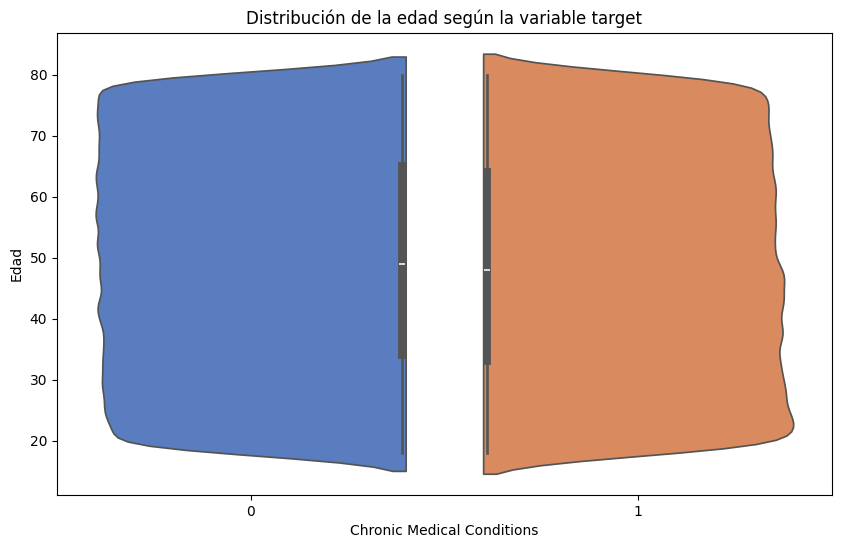

In [27]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Chronic Medical Conditions', y='Age', palette='muted', split=True)

plt.title('Distribución de la edad según la variable target')
plt.xlabel('Chronic Medical Conditions')
plt.ylabel('Edad')
plt.show()

No hace falta fijarse mucho en que para casi todas las edades, está la misma proporción en la distribución según la target. Muy seguro que son datos sintéticos.

In [28]:
def clasificar_edad(df):
    def categorizar_edad(i):
        if 18 <= i < 40:
            return 'Young Adulthood'
        elif 40 <= i < 60:
            return 'Adulthood'
        elif i >= 60:
            return 'Eld'
        
    df['Age_Group'] = df['Age'].apply(categorizar_edad)
    return df

df = clasificar_edad(df)
df.drop(columns = 'Age', inplace = True)

Ahora hacemos un dummies para cada grupo

In [29]:
dummies_age = pd.get_dummies(df['Age_Group'], prefix='Age')
df = pd.concat([df, dummies_age], axis=1)
df.drop(columns = 'Age_Group', inplace = True)
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood
0,Christine Barker,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,1,0,1,1,False,False,True
1,Jacqueline Lewis,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,1,0,0,1,True,False,False
2,Shannon Church,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,0,0,1,0,False,True,False
3,Charles Jordan,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,0,0,0,0,True,False,False
4,Michael Rich,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,1,0,1,1,False,False,True


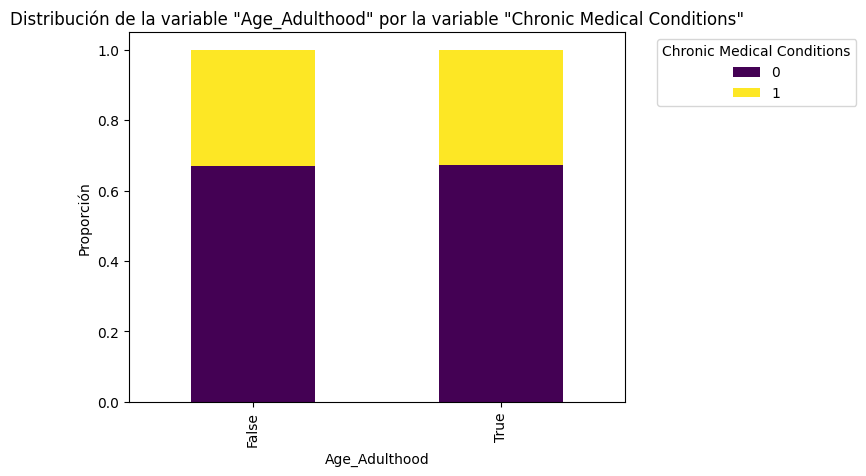

In [30]:
cross_tab = pd.crosstab(df['Age_Adulthood'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Age_Adulthood" por la variable "Chronic Medical Conditions"')
plt.xlabel('Age_Adulthood')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

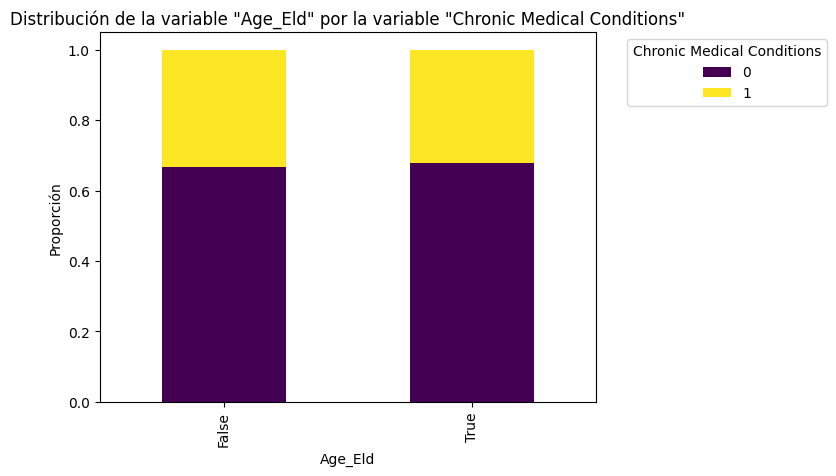

In [31]:
cross_tab = pd.crosstab(df['Age_Eld'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Age_Eld" por la variable "Chronic Medical Conditions"')
plt.xlabel('Age_Eld')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

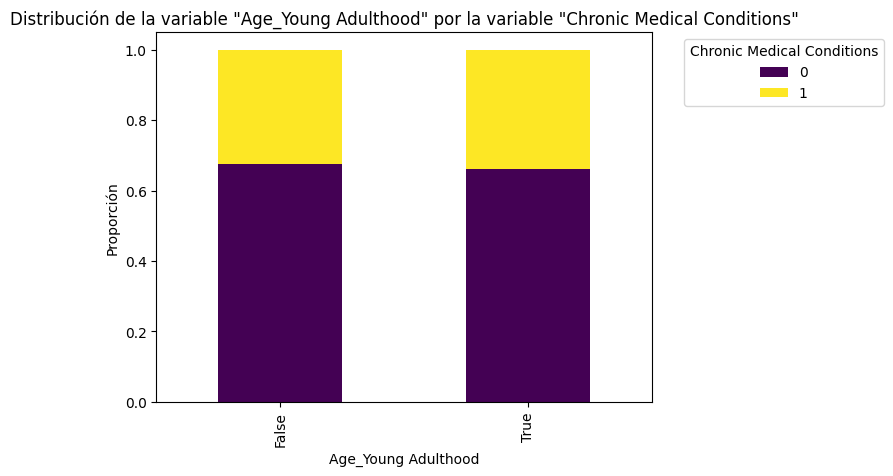

In [32]:
cross_tab = pd.crosstab(df['Age_Young Adulthood'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Age_Young Adulthood" por la variable "Chronic Medical Conditions"')
plt.xlabel('Age_Young Adulthood')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [33]:
df['Age_Adulthood'].value_counts()

Age_Adulthood
False    281738
True     132030
Name: count, dtype: int64

In [34]:
df['Age_Eld'].value_counts()

Age_Eld
False    276159
True     137609
Name: count, dtype: int64

In [35]:
df['Age_Young Adulthood'].value_counts()

Age_Young Adulthood
False    269639
True     144129
Name: count, dtype: int64

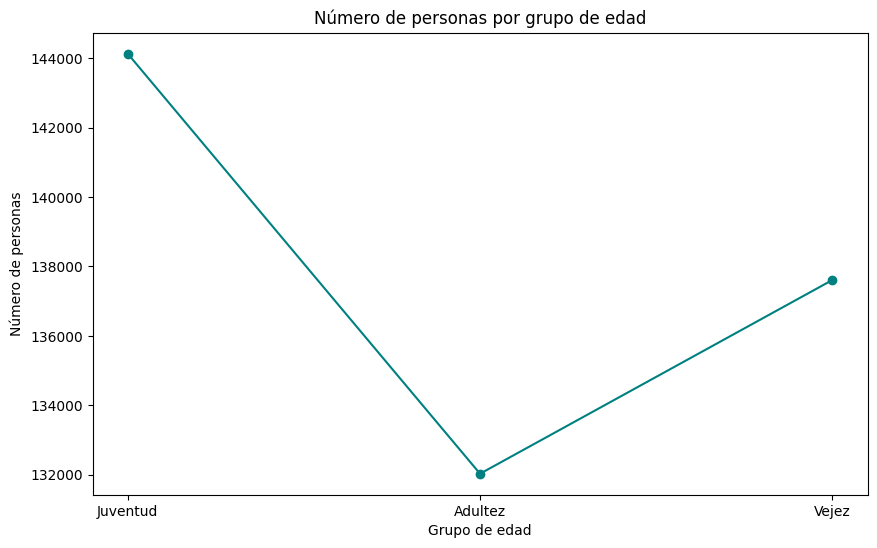

In [36]:
grupos_edad = ['Juventud', 'Adultez', 'Vejez']
valores = [144129, 132030, 137609]

plt.figure(figsize=(10, 6))
plt.plot(grupos_edad, valores, marker='o', linestyle='-', color='teal')

# Añadir títulos y etiquetas
plt.title('Número de personas por grupo de edad')
plt.xlabel('Grupo de edad')
plt.ylabel('Número de personas')

plt.show()

## Actividad física (Physical Activity Level)

Creamos una nueva variable, dando puntuacion a su salud actual según sus hábitos.

In [37]:
df['Physical Activity Level'].unique()

array(['Active', 'Sedentary', 'Moderate'], dtype=object)

In [38]:
df['Physical Activity Level'] = df['Physical Activity Level'].replace({'Active': 0, 'Sedentary' : 10, 'Moderate': 5})

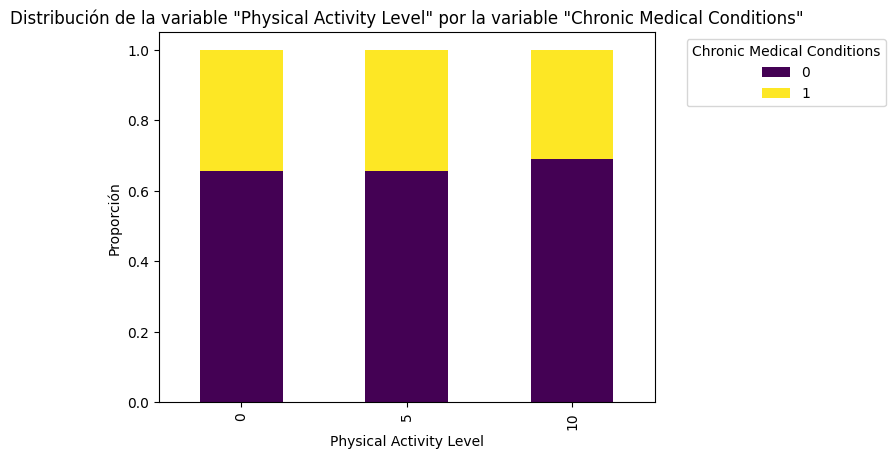

In [39]:
cross_tab = pd.crosstab(df['Physical Activity Level'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Physical Activity Level" por la variable "Chronic Medical Conditions"')
plt.xlabel('Physical Activity Level')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Tabaquismo (Somking Status)

In [40]:
df['Smoking Status'].unique()

array(['Non-smoker', 'Former', 'Current'], dtype=object)

In [41]:
df['Smoking Status'] = df['Smoking Status'].replace({'Non-smoker': 0, 'Current' : 10, 'Former': 5})

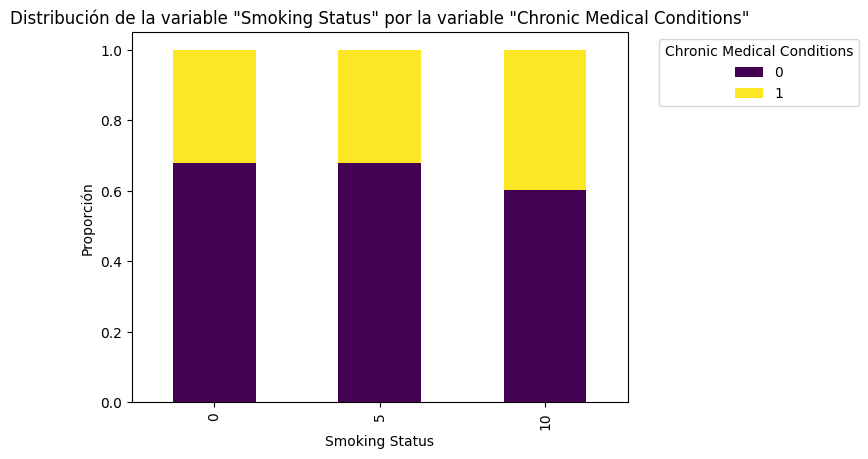

In [42]:
cross_tab = pd.crosstab(df['Smoking Status'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Smoking Status" por la variable "Chronic Medical Conditions"')
plt.xlabel('Smoking Status')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Consumo de alcohol (Alcohol Consumption)

In [43]:
df['Alcohol Consumption'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

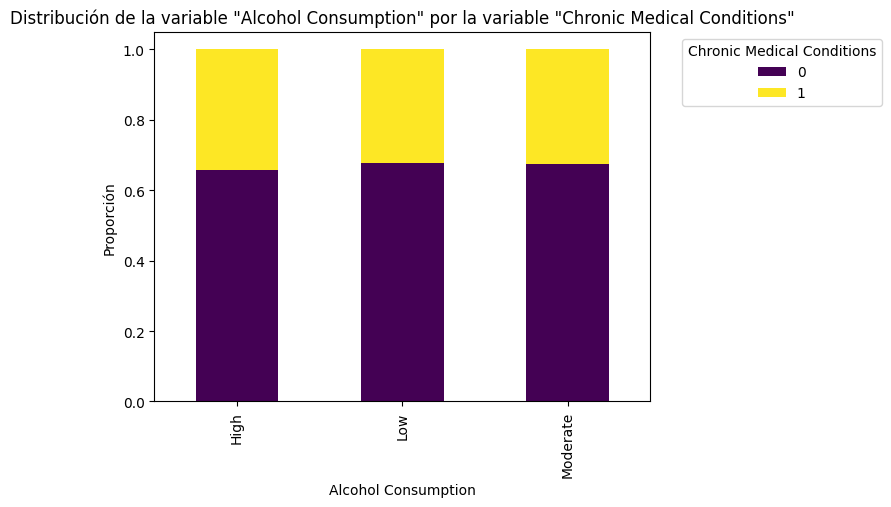

In [44]:
cross_tab = pd.crosstab(df['Alcohol Consumption'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Alcohol Consumption" por la variable "Chronic Medical Conditions"')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [45]:
df['Alcohol Consumption'] = df['Alcohol Consumption'] .replace({'Low': 0, 'Moderate' : 5, 'High': 10})

## Hábitos alimenticios (Dietary Habits)

In [229]:
df['Dietary Habits'].unique()

array(['Moderate', 'Unhealthy', 'Healthy'], dtype=object)

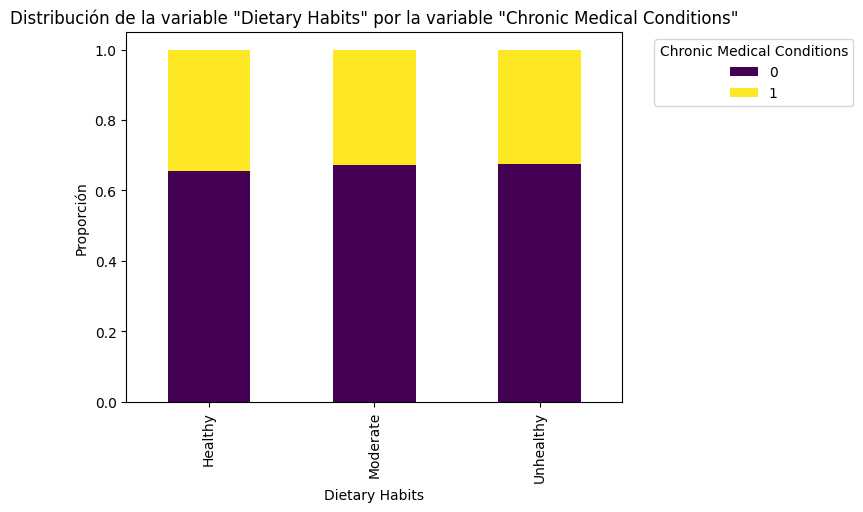

In [47]:
cross_tab = pd.crosstab(df['Dietary Habits'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Dietary Habits" por la variable "Chronic Medical Conditions"')
plt.xlabel('Dietary Habits')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [48]:
df['Dietary Habits'] = df['Dietary Habits'].replace({'Unhealthy': 10, 'Moderate' : 5, 'Healthy': 0})

## Hábitos del sueño (Sleep Patterns)

In [231]:
df['Sleep Patterns'].unique()

array(['Fair', 'Good', 'Poor'], dtype=object)

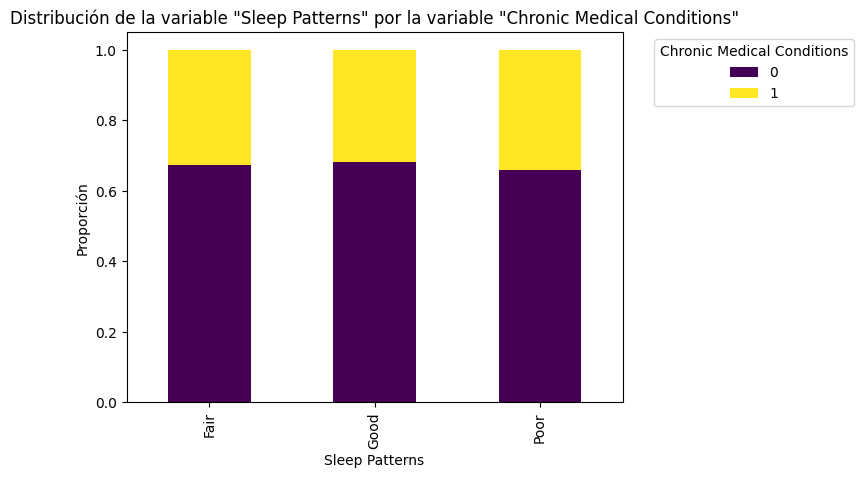

In [49]:
cross_tab = pd.crosstab(df['Sleep Patterns'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Sleep Patterns" por la variable "Chronic Medical Conditions"')
plt.xlabel('Sleep Patterns')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [50]:
df['Sleep Patterns'] = df['Sleep Patterns'].replace({'Poor': 10, 'Fair' : 5, 'Good': 0})

## SALARIOS (INCOME)

Nos aseguramos que no hay ingresos negativos

In [51]:
if (df['Income'] <= 0).any():
    print("Hay valores cero o negativos en 'Income'. Se necesitan ajustes antes de la transformación.")

Vamos a estudiar los salarios para ver si los dejamos como etsán, los transformamos con logaritmo, o los categorizamos y hacemos dummies.

In [52]:
df['Income'].nunique()

405282

<Axes: ylabel='Income'>

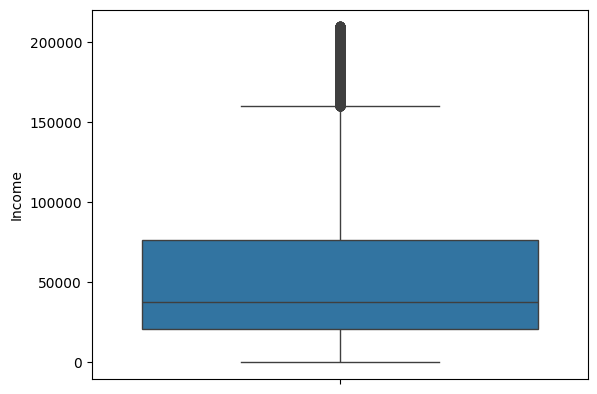

In [53]:
sns.boxplot(df['Income'])

Creemos columnas con ambas propuestas y estudiemoslas comparandolas con la original y frente a la target

In [54]:
df['Log_Income'] = np.log1p(df['Income'])  

In [55]:
df['Range_Income'] = pd.cut(df['Income'], bins=[0, 20000, 50000, 100000, 150000, 200000], labels=['Bajo', 'Medio Bajo', 'Medio', 'Medio Alto', 'Alto'])

<Axes: xlabel='Log_Income', ylabel='Count'>

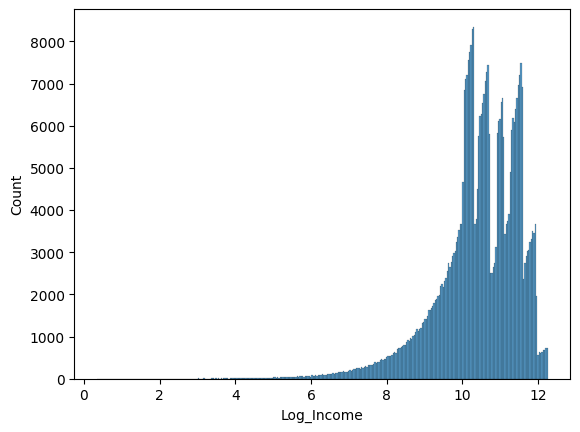

In [56]:
sns.histplot(df['Log_Income'])

<Axes: xlabel='Range_Income'>

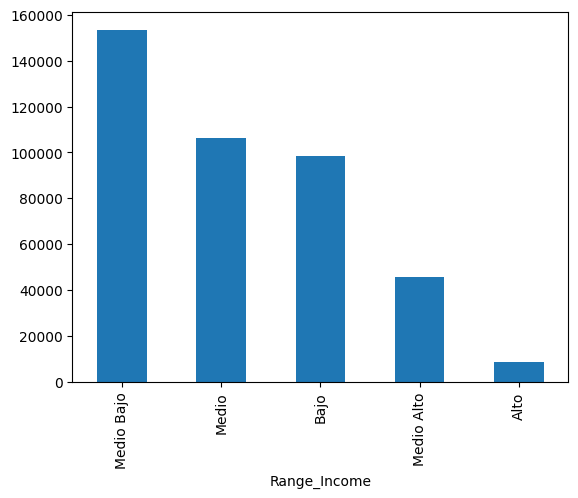

In [57]:
df['Range_Income'].value_counts().plot(kind='bar')

In [58]:
dummies = pd.get_dummies(df['Range_Income'], prefix='Income')
df = pd.concat([df, dummies], axis=1)
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,...,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income,Range_Income,Income_Bajo,Income_Medio Bajo,Income_Medio,Income_Medio Alto,Income_Alto
0,Christine Barker,Married,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,...,False,False,True,10.176056,Medio Bajo,False,True,False,False,False
1,Jacqueline Lewis,Married,High School,1,0,10,Employed,42710.36,10,10,...,True,False,False,10.662220,Medio Bajo,False,True,False,False,False
2,Shannon Church,Widowed,Master's Degree,1,0,10,Employed,125332.79,0,10,...,False,True,False,11.738736,Medio Alto,False,False,False,True,False
3,Charles Jordan,Divorced,Master's Degree,3,0,5,Unemployed,9992.78,5,5,...,True,False,False,9.209718,Bajo,True,False,False,False,False
4,Michael Rich,Single,High School,0,0,10,Unemployed,8595.08,0,5,...,False,False,True,9.059062,Bajo,True,False,False,False,False


In [ ]:
# sns.pairplot(df[['Income', 'Log_Income', 'Income_Bajo', 'Income_Medio Bajo', 'Income_Medio', 'Income_Medio Alto','Income_Alto','Chronic Medical Conditions']], hue = 'Chronic Medical Conditions')

# plt.show()

Observamos que la variable transformada logarítmicamente, `Log_Income`, presenta una distribución continua y una relación más clara y uniforme con otras variables, lo que sugiere una mayor capacidad para capturar patrones graduales en el modelo. Por otro lado, las variables dummies muestran un comportamiento más segmentado y específico, útil para la clasificación pero menos eficaz para representar tendencias continuas, lo que podría resultar en una pérdida de detalle sobre la variabilidad de los ingresos. Por lo tanto, elegimos la variable logarítmica, ya que permite una mejor representación de la variabilidad del ingreso y es más adecuada para modelos que buscan relaciones lineales o continuas, ayudando a evitar el overfitting y optimizando el análisis predictivo.

Eliminamos las variables del dummies y de los rangos

In [242]:
df.columns

Index(['Name', 'Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Income', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Chronic Medical Conditions',
       'Age_Adulthood', 'Age_Eld', 'Age_Young Adulthood', 'Log_Income',
       'Range_Income', 'Income_Bajo', 'Income_Medio Bajo', 'Income_Medio',
       'Income_Medio Alto', 'Income_Alto'],
      dtype='object')

In [59]:
df.drop(columns = ['Range_Income', 'Income_Bajo',
       'Income_Medio Bajo', 'Income_Medio', 'Income_Medio Alto',
       'Income_Alto'], inplace = True)

In [60]:
df.head()

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income
0,Christine Barker,Married,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,5,1,0,1,1,False,False,True,10.176056
1,Jacqueline Lewis,Married,High School,1,0,10,Employed,42710.36,10,10,5,1,0,0,1,True,False,False,10.662220
2,Shannon Church,Widowed,Master's Degree,1,0,10,Employed,125332.79,0,10,0,0,0,1,0,False,True,False,11.738736
3,Charles Jordan,Divorced,Master's Degree,3,0,5,Unemployed,9992.78,5,5,10,0,0,0,0,True,False,False,9.209718
4,Michael Rich,Single,High School,0,0,10,Unemployed,8595.08,0,5,5,1,0,1,1,False,False,True,9.059062


## Estado civil (Marital Status)

Haremos un dummies, ya que un Label Encoder no tiene sentido, ya que no son ordinales.

In [245]:
df['Marital Status'].unique()

array(['Married', 'Widowed', 'Divorced', 'Single'], dtype=object)

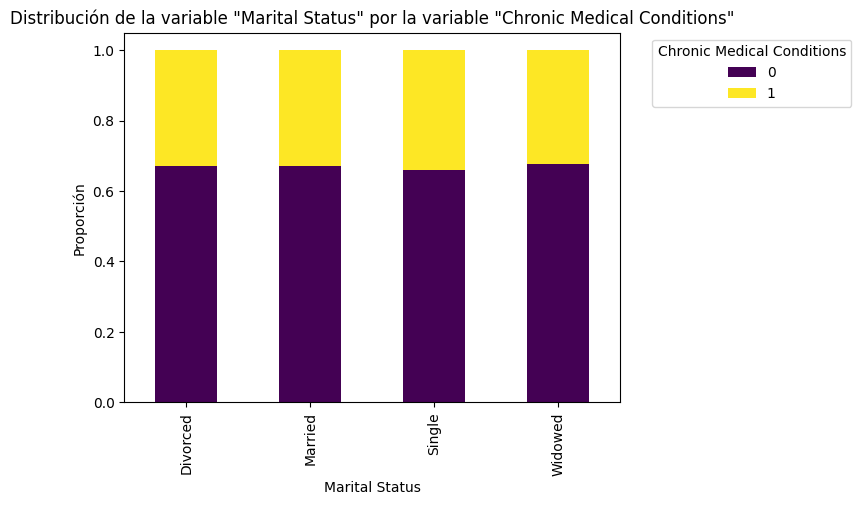

In [61]:
cross_tab = pd.crosstab(df['Marital Status'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Marital Status" por la variable "Chronic Medical Conditions"')
plt.xlabel('Marital Status')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [62]:
dummies = pd.get_dummies(df['Marital Status'], prefix='Status')
df = pd.concat([df, dummies], axis=1)
df.drop(columns = 'Marital Status', inplace = True)
df.head()

,Name,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,...,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed
0,Christine Barker,Bachelor's Degree,2,0,0,Unemployed,26265.67,5,5,5,...,1,1,False,False,True,10.176056,False,True,False,False
1,Jacqueline Lewis,High School,1,0,10,Employed,42710.36,10,10,5,...,0,1,True,False,False,10.662220,False,True,False,False
2,Shannon Church,Master's Degree,1,0,10,Employed,125332.79,0,10,0,...,1,0,False,True,False,11.738736,False,False,False,True
3,Charles Jordan,Master's Degree,3,0,5,Unemployed,9992.78,5,5,10,...,0,0,True,False,False,9.209718,True,False,False,False
4,Michael Rich,High School,0,0,10,Unemployed,8595.08,0,5,5,...,1,1,False,False,True,9.059062,False,False,True,False


## Nivel académico (Education Level)

Aplicamos otro dummies, ya que aunque las variables vayan en progresión educativa, asignarles valores numéricos aplicaría un sesgo al estar planteándolo desde cuánto afecta a la salud mental, y no hay una relacion objetiva directa ni un orden lógico para este tema

In [247]:
df['Education Level'].unique()

array(["Bachelor's Degree", 'High School', "Master's Degree",
       'Associate Degree', 'PhD'], dtype=object)

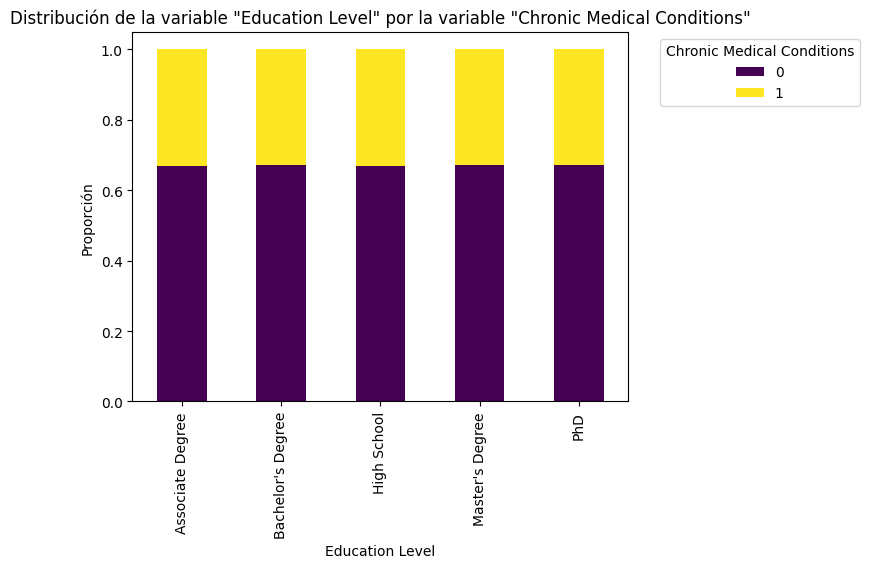

In [63]:
cross_tab = pd.crosstab(df['Education Level'], df['Chronic Medical Conditions'], normalize='index')

cross_tab.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución de la variable "Education Level" por la variable "Chronic Medical Conditions"')
plt.xlabel('Education Level')
plt.ylabel('Proporción')
plt.legend(title='Chronic Medical Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [69]:
dummies_education = pd.get_dummies(df['Education Level'], prefix='Education')
df = pd.concat([df, dummies_education], axis=1)
df.drop(columns = 'Education Level', inplace = True)
df.head()

,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,...,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,2,0,0,1,26265.67,5,5,5,1,0,...,10.176056,False,True,False,False,False,True,False,False,False
1,1,0,10,0,42710.36,10,10,5,1,0,...,10.662220,False,True,False,False,False,False,True,False,False
2,1,0,10,0,125332.79,0,10,0,0,0,...,11.738736,False,False,False,True,False,False,False,True,False
3,3,0,5,1,9992.78,5,5,10,0,0,...,9.209718,True,False,False,False,False,False,False,True,False
4,0,0,10,1,8595.08,0,5,5,1,0,...,9.059062,False,False,True,False,False,False,True,False,False


## Estado laboral (Employment Status)

De nuevo, convertimos a numéica esta variable binaria

In [64]:
df['Employment Status'].unique()

array(['Unemployed', 'Employed'], dtype=object)

In [65]:
df['Employment Status'] = df['Employment Status'].replace({'Unemployed': 1, 'Employed' : 0})

In [70]:
df.head()

,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,...,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD
0,2,0,0,1,26265.67,5,5,5,1,0,...,10.176056,False,True,False,False,False,True,False,False,False
1,1,0,10,0,42710.36,10,10,5,1,0,...,10.662220,False,True,False,False,False,False,True,False,False
2,1,0,10,0,125332.79,0,10,0,0,0,...,11.738736,False,False,False,True,False,False,False,True,False
3,3,0,5,1,9992.78,5,5,10,0,0,...,9.209718,True,False,False,False,False,False,False,True,False
4,0,0,10,1,8595.08,0,5,5,1,0,...,9.059062,False,False,True,False,False,False,True,False,False


Eliminamos los nombres porque no aportan nada

In [67]:
df.drop(columns = 'Name', inplace = True)

In [68]:
df.head()

,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,...,Family History of Depression,Chronic Medical Conditions,Age_Adulthood,Age_Eld,Age_Young Adulthood,Log_Income,Status_Divorced,Status_Married,Status_Single,Status_Widowed
0,Bachelor's Degree,2,0,0,1,26265.67,5,5,5,1,...,1,1,False,False,True,10.176056,False,True,False,False
1,High School,1,0,10,0,42710.36,10,10,5,1,...,0,1,True,False,False,10.662220,False,True,False,False
2,Master's Degree,1,0,10,0,125332.79,0,10,0,0,...,1,0,False,True,False,11.738736,False,False,False,True
3,Master's Degree,3,0,5,1,9992.78,5,5,10,0,...,0,0,True,False,False,9.209718,True,False,False,False
4,High School,0,0,10,1,8595.08,0,5,5,1,...,1,1,False,False,True,9.059062,False,False,True,False


Movemos la variable target al final y, de paso, la llamamos así

In [71]:
df['Target'] = df['Chronic Medical Conditions']
df.drop(columns='Chronic Medical Conditions', inplace = True)

In [256]:
df.head()

,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,...,Status_Divorced,Status_Married,Status_Single,Status_Widowed,Education_Associate Degree,Education_Bachelor's Degree,Education_High School,Education_Master's Degree,Education_PhD,Target
0,2,0,0,1,26265.67,5,5,5,1,0,...,False,True,False,False,False,True,False,False,False,1
1,1,0,10,0,42710.36,10,10,5,1,0,...,False,True,False,False,False,False,True,False,False,1
2,1,0,10,0,125332.79,0,10,0,0,0,...,False,False,False,True,False,False,False,True,False,0
3,3,0,5,1,9992.78,5,5,10,0,0,...,True,False,False,False,False,False,False,True,False,0
4,0,0,10,1,8595.08,0,5,5,1,0,...,False,False,True,False,False,False,True,False,False,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Number of Children            413768 non-null  int64  
 1   Smoking Status                413768 non-null  int64  
 2   Physical Activity Level       413768 non-null  int64  
 3   Employment Status             413768 non-null  int64  
 4   Income                        413768 non-null  float64
 5   Alcohol Consumption           413768 non-null  int64  
 6   Dietary Habits                413768 non-null  int64  
 7   Sleep Patterns                413768 non-null  int64  
 8   History of Mental Illness     413768 non-null  int64  
 9   History of Substance Abuse    413768 non-null  int64  
 10  Family History of Depression  413768 non-null  int64  
 11  Age_Adulthood                 413768 non-null  bool   
 12  Age_Eld                       413768 non-nul

<Axes: >

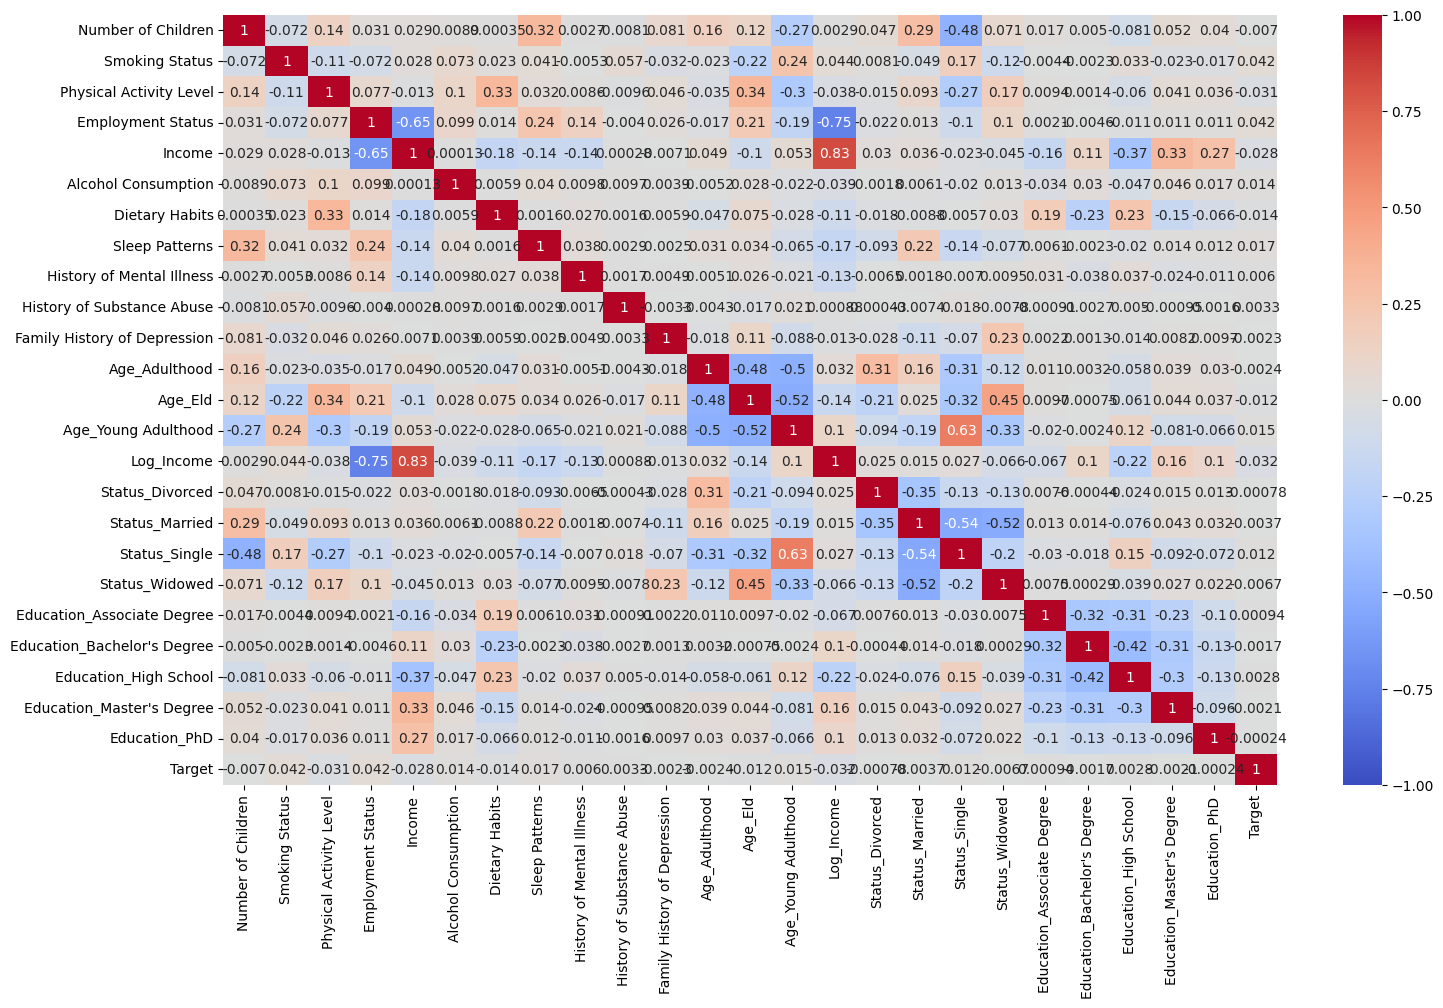

In [73]:
plt.figure(figsize=(17,10))
sns.heatmap(df.corr(),vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

Exportamos el csv procesado

In [258]:
df.to_csv('../data/processed/df_procesado.csv')

NOTA:
<br>Hay feature engineering que fue eliminado para primar la limpieza del notebook. Consistian en probar un LabelEncoder en lugar de un dummies para variables como Estado Civil, etc. Al igual con gráficas de correlacion, scatterplots y demás, que no servian de mucho al estar idénticas las distribuciones de variables.

### NOTA

Probamos a generar un csv cambiando las proporciones de las variables con ChatGPT, para entrnar al modelo de una forma más realista dentro de la sinteticidad de esta situación. Esta en una subcarpeta dentro de notebooks llamada "2ª Casuística"